In [7]:
from keras.models import load_model
import pandas as pd
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from scipy.misc import imresize
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
from imblearn.over_sampling import SMOTE
from keras.utils.np_utils import to_categorical
%matplotlib inline

In [4]:
def load_label(path):
    label = pd.read_table(path, sep=',', header=None)
    label.columns=['video','jpg', 'interesting', 'level', 'key_frame']
    label = label.groupby(['jpg'], sort=False, as_index=False).max()
    return label

train_label = load_label('data/devset-image.txt')
test_label = load_label('data/testset-image.txt')

In [5]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=1):
    if beta < 0:
     raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
     return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

In [8]:
model = load_model('weights.h5', custom_objects={'precision': precision, 'recall': recall, 'fbeta_score': fbeta_score})

ValueError: Optimizer weight shape (96,) not compatible with provided weight shape (32,)

In [5]:
test = np.load('test_array.npy')

In [8]:
model.evaluate(test, to_categorical(test_label['interesting']))

100/100 [==============================] - 24s    


[0.50508934736251831, 0.88]

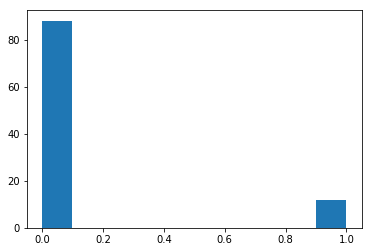

In [11]:
plt.hist(test_label['interesting'][:100]);

In [17]:
model.predict(test[:20])

array([[ 0.89880919,  0.10142256],
       [ 0.89880919,  0.10142265],
       [ 0.89880902,  0.10142282],
       [ 0.89880931,  0.10142249],
       [ 0.89880931,  0.10142247],
       [ 0.89880913,  0.10142265],
       [ 0.89880919,  0.1014226 ],
       [ 0.89880919,  0.10142256],
       [ 0.89880902,  0.10142278],
       [ 0.89880902,  0.10142278],
       [ 0.89880902,  0.10142276],
       [ 0.89880902,  0.10142269],
       [ 0.89880621,  0.10142505],
       [ 0.89880902,  0.10142273],
       [ 0.89880902,  0.10142279],
       [ 0.89880913,  0.10142267],
       [ 0.89880902,  0.1014227 ],
       [ 0.89880919,  0.1014226 ],
       [ 0.89880902,  0.10142273],
       [ 0.89880913,  0.10142267]], dtype=float32)

In [16]:
test_label['interesting'][:20]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    1
Name: interesting, dtype: int64

In [4]:
def flat(list_):
    list_a = []
    for i in list_:
        list_a.append(i.flatten())
    return list_a

In [5]:
train = np.load('train_array.npy')
train_flat = flat(train)
y = np.array(train_label['interesting'])
a=np.array(train_flat)
y = np.reshape(y, (4942,1))
new_array = np.hstack((a,y))
ind = np.argsort(new_array[:,-1])
new_array = new_array[ind]
np.save('sorted_array', new_array)